# به نام خدای رنگین کمان

&#128293; **Subject** : Forest Fire Prediction and Detection Analysis with 2000-2021 IRAN fire points
***
&#128100; **name** :  `Hossein jafari`                   

&#127380; **studential ID**  : `98242040`

&#128100; **name2** : `Ramyar Ahmadi`             

&#127380; **Studential ID 2** : `98242001`
***
&#128100; **Lecturer** : `Dr. Atefeh Aghaei`
***
&#128218; **references** : 
<br>  __[NASA map](https://firms.modaps.eosdis.nasa.gov/)__
<br>  __[kaggle](https://www.kaggle.com/)__
<br>  __[paperswithcode](https://paperswithcode.com/)__
<br>  __[github](https://github.com/)__
<br>  __[stackoverflow](https://stackoverflow.com/)__   

# &#9655; `First Stage : Data Processing`


In [2]:
# import the data set
import pandas as pd
dataset = pd.read_csv("2000-2021_Iran.csv")
dataset.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,32.3529,47.7131,323.5,1.7,1.3,11/1/2000,816,Terra,MODIS,75,6.2,305.2,25.8,D,2.0
1,31.3158,49.2857,330.1,2.3,1.5,11/1/2000,816,Terra,MODIS,82,6.2,305.2,57.1,D,2.0
2,31.4066,48.6525,324.0,2.1,1.4,11/1/2000,816,Terra,MODIS,75,6.2,305.2,28.3,D,2.0
3,31.2482,49.1620,323.1,2.3,1.5,11/1/2000,816,Terra,MODIS,74,6.2,305.8,28.6,D,0.0
4,31.2099,48.9591,324.9,2.2,1.4,11/1/2000,816,Terra,MODIS,76,6.2,306.5,30.9,D,2.0


In [2]:
dataset.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,427400.000000
mean,31.391776,49.760631,318.360151,1.600792,1.209692,1408.226166,69.783513,6.162620,299.272991,24.362145,1.427625
std,2.298832,2.349660,13.160709,0.796860,0.243308,614.512951,20.220226,0.070408,11.422803,32.065370,0.918367
min,25.290600,44.154900,300.000000,1.000000,1.000000,605.000000,0.000000,6.030000,265.000000,0.000000,0.000000
25%,30.390900,48.271900,308.200000,1.100000,1.000000,758.000000,58.000000,6.200000,291.400000,9.300000,0.000000
50%,31.135200,49.280600,315.400000,1.300000,1.100000,1021.000000,72.000000,6.200000,297.800000,15.400000,2.000000
75%,32.246200,50.738100,326.900000,1.800000,1.300000,1916.000000,84.000000,6.200000,305.200000,28.300000,2.000000
max,39.713700,63.101300,502.800000,4.800000,2.000000,2344.000000,100.000000,6.200000,400.100000,2419.700000,3.000000


In [3]:
dataset.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type          float64
dtype: object

In [4]:
# copy
data = dataset

In [5]:
# بررسی داده های از دست رفته
data.isna().sum()

latitude         0
longitude        0
brightness       0
scan             0
track            0
acq_date         0
acq_time         0
satellite        0
instrument       0
confidence       0
version          0
bright_t31       0
frp              0
daynight         0
type          5047
dtype: int64

In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

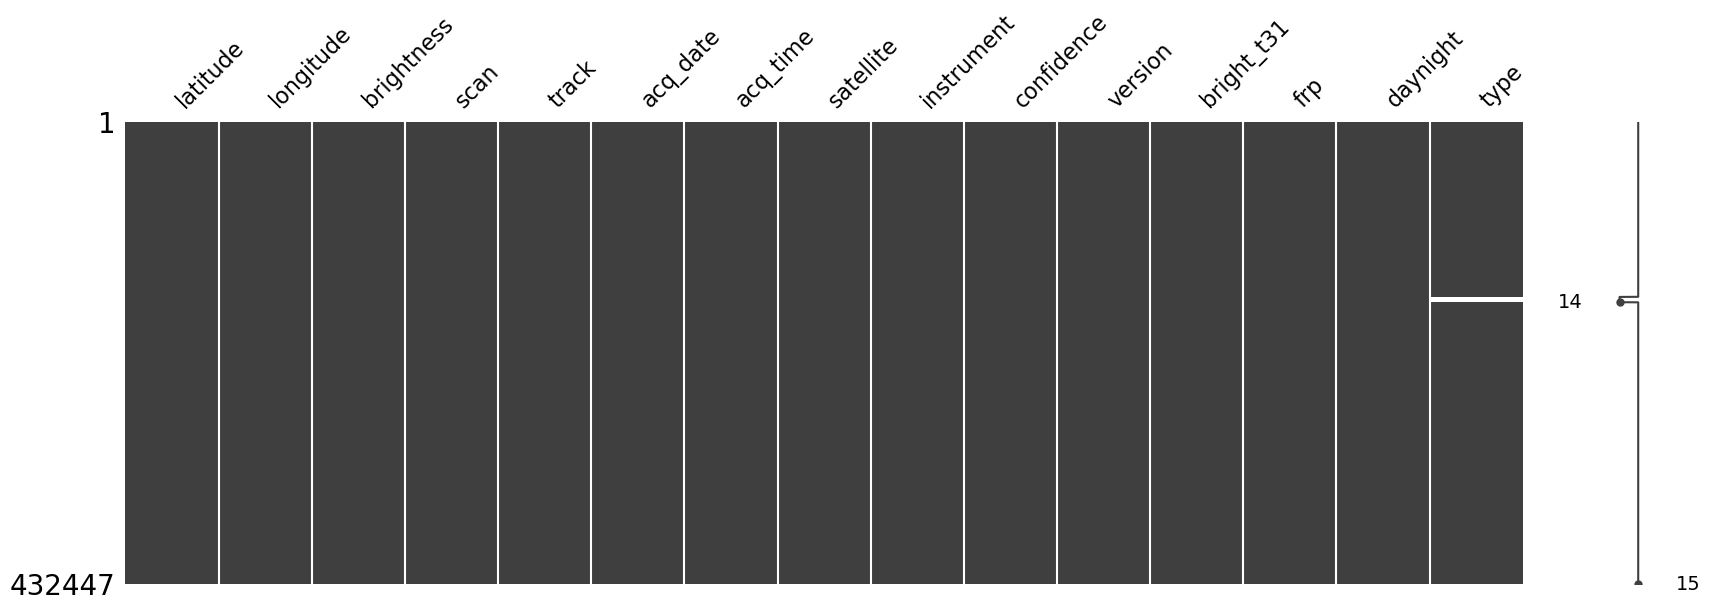

In [7]:
# مکان دقیق داده حذف شده مون
import missingno as mno
mno.matrix(data, figsize = (20, 6))

In [8]:
# جداسازی سال، ماه و روز از تاریخ اصلی (تاریخ اتش سوزی)
data[["Month", "Day", "Year"]] = data["acq_date"].str.split("/", expand = True)
#data["Month"]

In [9]:
# data types
data.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type          float64
Month          object
Day            object
Year           object
dtype: object

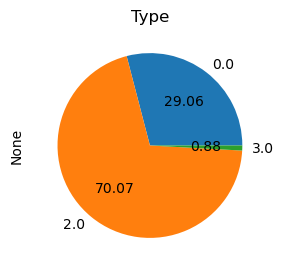

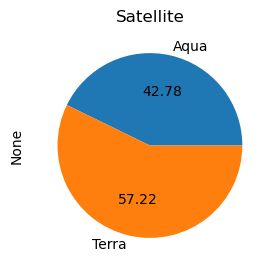

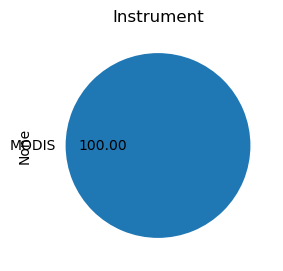

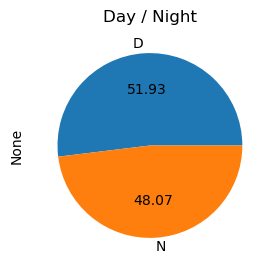

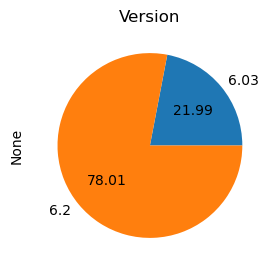

In [10]:
# plotting pie charts for all categorical columns
import matplotlib.pyplot as plt
plt.figure(0)
plt.title("Type")
data.groupby('type').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))
plt.figure(1)
plt.title("Satellite")
data.groupby('satellite').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))
plt.figure(2)
plt.title("Instrument")
data.groupby('instrument').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))
plt.figure(3)
plt.title("Day / Night")
data.groupby('daynight').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))
plt.figure(4)
plt.title("Version")
data.groupby('version').size().plot(kind='pie', autopct='%.2f',figsize=(3, 3))

# رسم تمامی نمودار ها
plt.show()

In [11]:
# حذف ستون instrument
data = data.drop(['instrument'], axis = 1)

# عوض کردن دیتا تایپ یه سری از ستون ها
data["version"]= data["version"].astype(str)
data["Year"]= data["Year"].astype(int)
data["Month"]= data["Month"].astype(int)
data["Day"]= data["Day"].astype(int)

# add leading zeroes to time and convert
data['acq_time']=data['acq_time'].apply(lambda x: '{0:0>4}'.format(x))
data["acq_time"]= data["acq_time"].astype(int)

In [12]:
# convert object columns to numrical columns through encoding
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['satellite']=l.fit_transform(data['satellite'])
data['daynight']=l.fit_transform(data['daynight'])
data['version']=l.fit_transform(data['version'])
data["version"]= data["version"].astype(int)

In [13]:
# بررسی نهایی دیتا تایپ
data.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int32
satellite       int32
confidence      int64
version         int32
bright_t31    float64
frp           float64
daynight        int32
type          float64
Month           int32
Day             int32
Year            int32
dtype: object

In [14]:
# normalization
def minmax(column):
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())    

minmax('bright_t31')
minmax('brightness')
minmax('frp')

In [15]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight,type,Month,Day,Year
0,32.3529,47.7131,0.115878,1.7,1.3,11/1/2000,816,1,75,1,0.297557,0.010662,0,2.0,11,1,2000
1,31.3158,49.2857,0.148422,2.3,1.5,11/1/2000,816,1,82,1,0.297557,0.023598,0,2.0,11,1,2000
2,31.4066,48.6525,0.118343,2.1,1.4,11/1/2000,816,1,75,1,0.297557,0.011696,0,2.0,11,1,2000
3,31.2482,49.1620,0.113905,2.3,1.5,11/1/2000,816,1,74,1,0.301999,0.011820,0,0.0,11,1,2000
4,31.2099,48.9591,0.122781,2.2,1.4,11/1/2000,816,1,76,1,0.307180,0.012770,0,2.0,11,1,2000


In [21]:
data1 = data.drop(['acq_date'], axis = 1)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
train_data = data1.dropna()
test_data = data1[data1.isnull().any(axis=1)]
x_train = train_data.drop(['type'], axis = 1)
y_train = train_data['type']
x_test = test_data.drop(['type'], axis = 1)
y_test = test_data['type']

# فیت کردن دیتا در مدل مناسب
#model = LogisticRegression(solver='liblinear', random_state=0)
model = DecisionTreeClassifier( random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
# accuracy
model.score(x_train, y_train)

1.0

In [28]:
# probability of target variable
model.predict_proba(x_test) 

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [29]:
y_pred = model.predict(x_test)
# تبدیل به فرم دیتا فریم 
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
5042,0.0
5043,2.0
5044,0.0
5045,0.0


In [30]:
# تعویض داده های گمشده با داده های پیشبینی شده به روش لاجستیک رگرسیون
test_data['type'] = y_pred.values

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21488\3350551199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['type'] = y_pred.values


In [31]:
test_data

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,version,bright_t31,frp,daynight,type,Month,Day,Year
163740,32.2392,51.4269,0.037968,1.4,1.2,2217,0,72,1,0.218357,0.005042,1,2.0,7,24,2009
163741,30.9005,49.6850,0.096647,1.7,1.3,2217,0,99,1,0.279793,0.010662,1,2.0,7,24,2009
163742,30.7586,48.2743,0.131657,2.1,1.4,2217,0,100,1,0.256107,0.025995,1,2.0,7,24,2009
163743,30.7608,48.2793,0.165187,2.1,1.4,2217,0,100,1,0.260548,0.036285,1,2.0,7,24,2009
163744,32.3579,47.7059,0.065582,2.4,1.5,2217,0,85,1,0.264989,0.011737,1,2.0,7,24,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168782,31.4719,47.8127,0.247041,1.2,1.1,1018,0,93,1,0.370836,0.026202,0,0.0,10,3,2009
168783,31.2065,48.9485,0.217456,1.3,1.1,1018,0,88,1,0.417469,0.018763,0,2.0,10,3,2009
168784,34.5167,46.6421,0.178501,1.1,1.1,1019,0,82,1,0.374537,0.010786,0,0.0,10,3,2009
168785,33.9788,46.2761,0.227318,1.1,1.0,1019,0,90,1,0.385640,0.018019,0,0.0,10,3,2009


In [32]:
test_data['type'].value_counts()

2.0    3907
0.0    1110
3.0      30
Name: type, dtype: int64

## Working with Dataset

In [33]:
# merge train and test datasets
datasets = [train_data, test_data]
dataset = pd.concat(datasets)
dataset

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,version,bright_t31,frp,daynight,type,Month,Day,Year
0,32.3529,47.7131,0.115878,1.7,1.3,816,1,75,1,0.297557,0.010662,0,2.0,11,1,2000
1,31.3158,49.2857,0.148422,2.3,1.5,816,1,82,1,0.297557,0.023598,0,2.0,11,1,2000
2,31.4066,48.6525,0.118343,2.1,1.4,816,1,75,1,0.297557,0.011696,0,2.0,11,1,2000
3,31.2482,49.1620,0.113905,2.3,1.5,816,1,74,1,0.301999,0.011820,0,0.0,11,1,2000
4,31.2099,48.9591,0.122781,2.2,1.4,816,1,76,1,0.307180,0.012770,0,2.0,11,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168782,31.4719,47.8127,0.247041,1.2,1.1,1018,0,93,1,0.370836,0.026202,0,0.0,10,3,2009
168783,31.2065,48.9485,0.217456,1.3,1.1,1018,0,88,1,0.417469,0.018763,0,2.0,10,3,2009
168784,34.5167,46.6421,0.178501,1.1,1.1,1019,0,82,1,0.374537,0.010786,0,0.0,10,3,2009
168785,33.9788,46.2761,0.227318,1.1,1.0,1019,0,90,1,0.385640,0.018019,0,0.0,10,3,2009


In [34]:
dataset.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_time        int32
satellite       int32
confidence      int64
version         int32
bright_t31    float64
frp           float64
daynight        int32
type          float64
Month           int32
Day             int32
Year            int32
dtype: object

In [35]:
# بررسی نهایی داده های گم شده
dataset.isna().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_time      0
satellite     0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
Month         0
Day           0
Year          0
dtype: int64

## Analysis 

In [36]:
dataset.describe()

,latitude,longitude,brightness,scan,track,acq_time,satellite,confidence,version,bright_t31,frp,daynight,type,Month,Day,Year
count,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000,432447.000000
mean,31.391776,49.760631,0.090533,1.600792,1.209692,1408.226166,0.572167,69.783513,0.780119,0.253686,0.010068,0.480690,1.429241,6.785148,15.700206,2011.694682
std,2.298832,2.349660,0.064895,0.796860,0.243308,614.512951,0.494765,20.220226,0.414167,0.084551,0.013252,0.499628,0.917559,3.277010,8.791538,5.897516
min,25.290600,44.154900,0.000000,1.000000,1.000000,605.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2000.000000
25%,30.390900,48.271900,0.040434,1.100000,1.000000,758.000000,0.000000,58.000000,1.000000,0.195411,0.003843,0.000000,0.000000,4.000000,8.000000,2007.000000
50%,31.135200,49.280600,0.075937,1.300000,1.100000,1021.000000,1.000000,72.000000,1.000000,0.242783,0.006364,0.000000,2.000000,7.000000,16.000000,2011.000000
75%,32.246200,50.738100,0.132643,1.800000,1.300000,1916.000000,1.000000,84.000000,1.000000,0.297557,0.011696,1.000000,2.000000,10.000000,23.000000,2017.000000
max,39.713700,63.101300,1.000000,4.800000,2.000000,2344.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,3.000000,12.000000,31.000000,2021.000000


### نقشه پراکندگی آتش سوزی مراتع در ایران 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

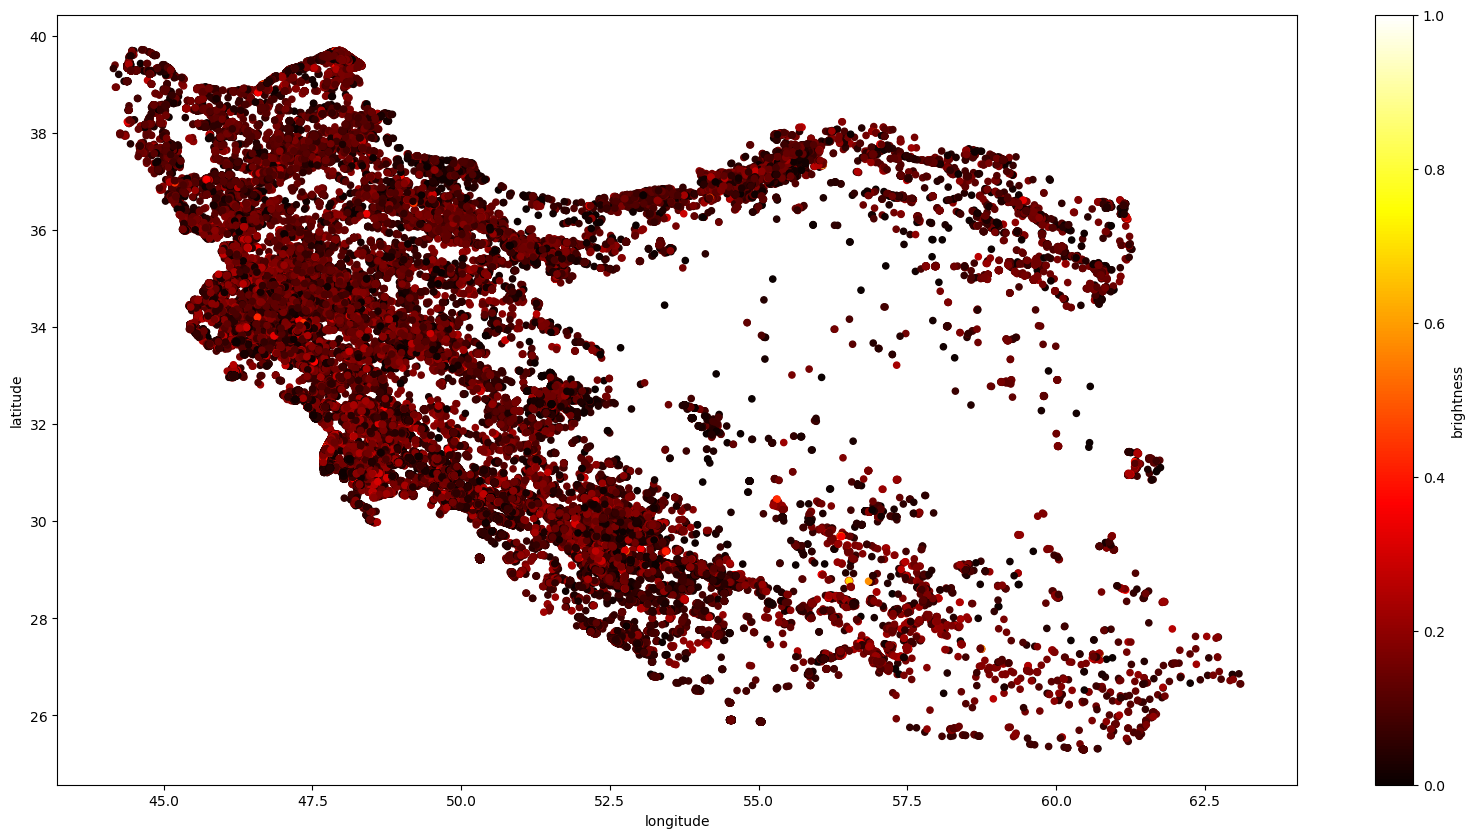

In [37]:
dataset.plot(x="longitude", y="latitude", kind="scatter", c="brightness",
        colormap="hot",figsize=(20, 10))

### پراکندگی آتش سوزی مراتع در سال های 2000 تا 2021

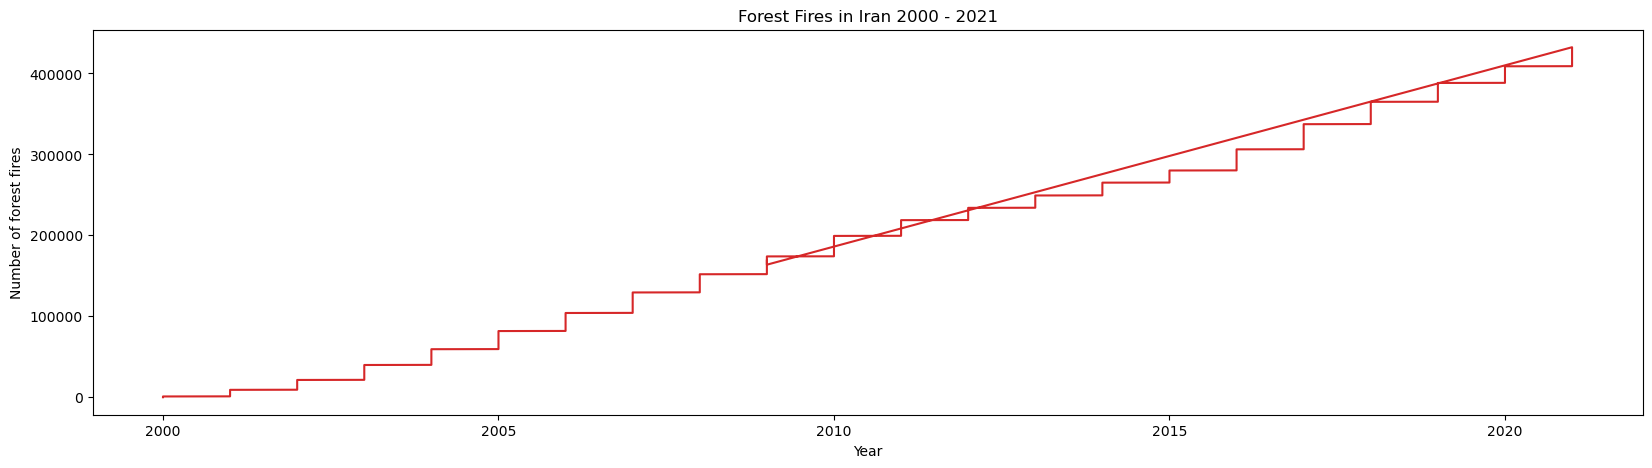

In [38]:
def plottrend(data, x, y, title="", xlabel='Year', ylabel='Number of forest fires', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plottrend(dataset, x=dataset.Year, y=dataset.index, title='Forest Fires in Iran 2000 - 2021')   
#dataset.Year

### نمودار پراکندگی آتش سوزی در روز و شب

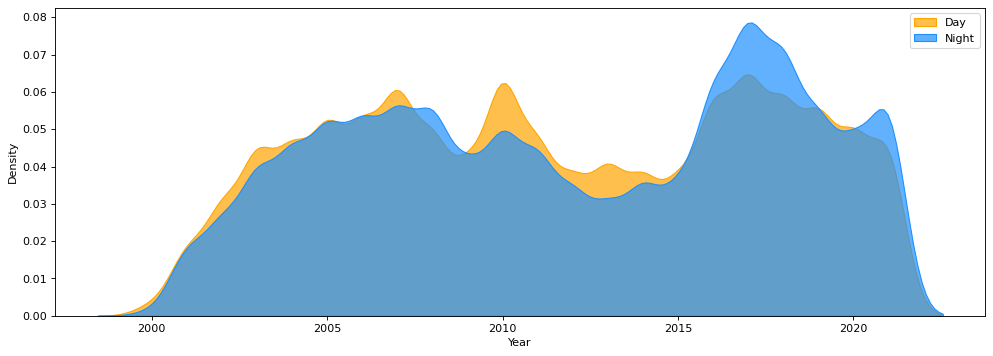

In [39]:
import seaborn as sns
plt.figure(figsize=(15,5), dpi= 80)
sns.kdeplot(train_data.loc[train_data['daynight'] == 0, "Year"], shade=True, color="orange", label="Day", alpha=.7)
sns.kdeplot(train_data.loc[train_data['daynight'] == 1, "Year"], shade=True, color="dodgerblue", label="Night", alpha=.7)
plt.legend()
plt.show()

### شدت آتش سوزی مراتع در روند های ماهانه

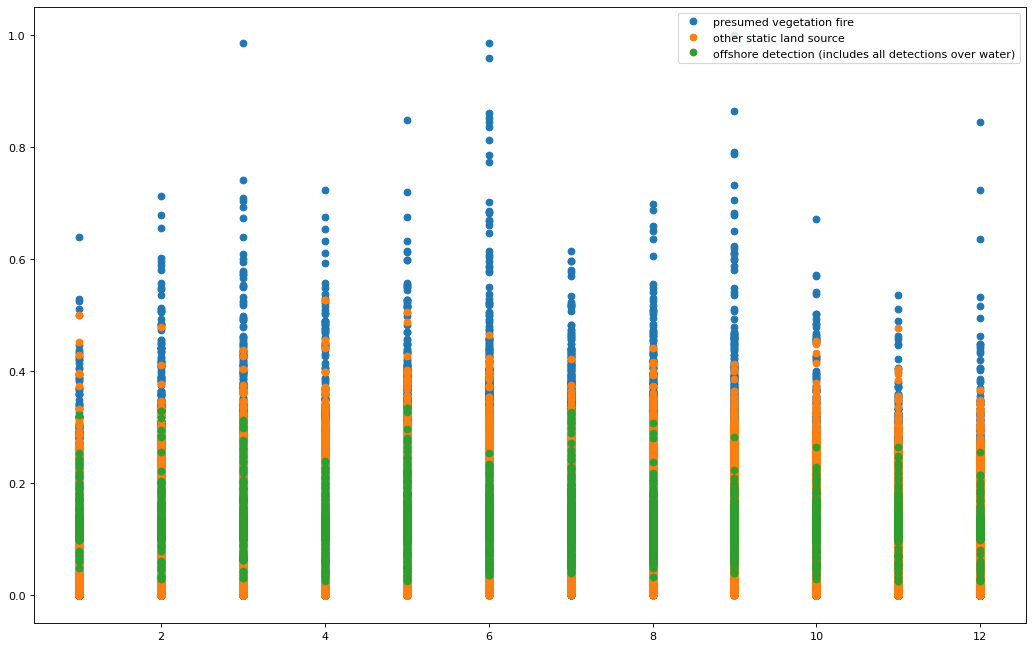

In [40]:
groups = dataset.groupby("type")
plt.figure(figsize=(16, 10), dpi= 80)
for name, group in groups:
    plt.plot(group["Month"], group["brightness"], marker="o", linestyle="", label=name)
plt.legend(['presumed vegetation fire', 'other static land source', 'offshore detection (includes all detections over water)'])

### نقشه حرارتی وابسته به ویژگی ها

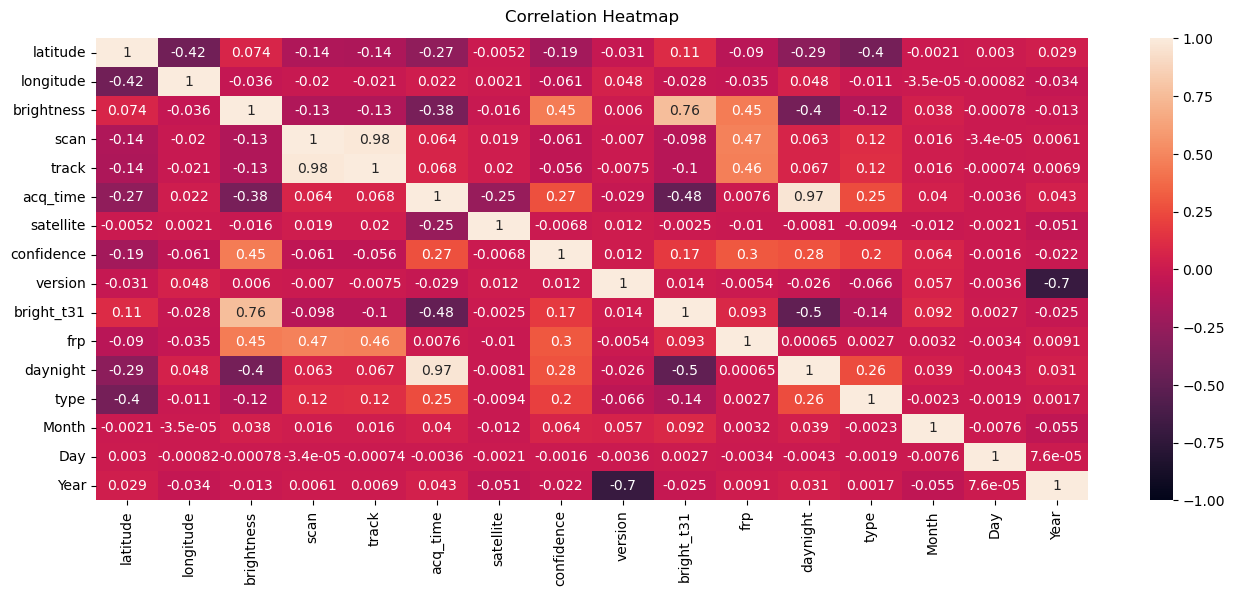

In [41]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### نقشه فصلی بر اساس آتش سوزی ماهانه

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


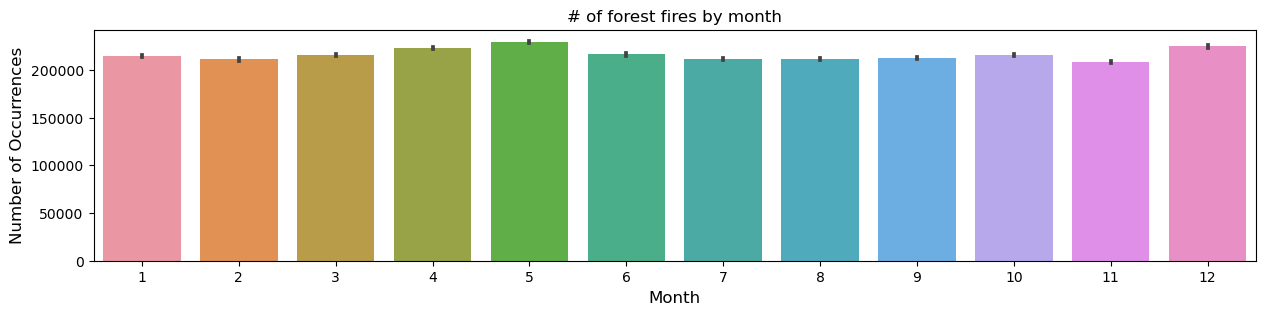

In [42]:
plt.figure(figsize=(15, 3))
plotdata = dataset
sns.barplot(plotdata.Month, plotdata.index)
plt.title('# of forest fires by month')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

# &#9655; `Second stage : Classifier Model`

In [59]:
X = dataset.drop(['type'], axis = 1)
y = dataset['type']

In [60]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [62]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[ clf2,  clf4], 
                          meta_classifier=lr)

print('5-fold cross validation:\n')
results, names = list(), list()
for clf, label in zip([clf1, clf2, clf3, clf4, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'Decision Tree',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, scoring='accuracy')
    results.append(scores)
    names.append(label)
    print("%s: %0.2f (%0.2f)" 
          % (label, scores.mean(), scores.std()))

5-fold cross validation:



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

KNN: 0.67 (0.04)
Random Forest: 0.71 (0.13)
Naive Bayes: 0.72 (0.02)
Decision Tree: 0.79 (0.16)
StackingClassifier: 0.79 (0.16)


# &#9655; `Third stage : Detection Model`

In [288]:
pip install opencv-contrib-python

In [289]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [290]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [291]:
import glob
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [292]:
# بارگذاری عکس ها
fire_images = glob.glob('C:/Users/ASUS/forest fire/Testing/fire/*.jpg')
nonfire_images = glob.glob('C:/Users/ASUS/forest fire/Testing/nofire/*.jpg')

In [293]:
# create a mix of both fire and non fire images
import pandas as pd
fire_data = []
for x in fire_images:
  fire_data.append([x,1])
for x in nonfire_images:
  fire_data.append([x,0])
random.shuffle(fire_data)
fire_df = pd.DataFrame(fire_data,columns = ['Path','Fire/Non-Fire'])

In [294]:
# preprocess the images
def preprocessing_image(filepath):
  img = cv2.imread(filepath) #read
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
  img = cv2.resize(img,(196,196))  # resize
  img = img / 255 #scale
  return img 

def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)
  return np.array(X),np.array(y)

X, y = create_format_dataset(fire_df)
X.shape,y.shape

((68, 196, 196, 3), (68,))

In [295]:
# split dataset for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y)
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 195, 195, 128)     1664      
                                                                 
 conv2d_4 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 97, 97, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 73728)            

In [296]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 10,batch_size = 32,callbacks = callbacks)

Epoch 1/10
2/2 [==============================] - 9s 4s/step - loss: 3.9692 - accuracy: 0.6383 - val_loss: 3.9027 - val_accuracy: 0.6667
Epoch 2/10
2/2 [==============================] - 5s 2s/step - loss: 1.6953 - accuracy: 0.7234 - val_loss: 3.7169 - val_accuracy: 0.3333
Epoch 3/10
2/2 [==============================] - 5s 2s/step - loss: 2.7873 - accuracy: 0.3830 - val_loss: 1.1683 - val_accuracy: 0.6667
Epoch 4/10
2/2 [==============================] - 5s 2s/step - loss: 0.5757 - accuracy: 0.8298 - val_loss: 0.6209 - val_accuracy: 0.6667
Epoch 5/10
2/2 [==============================] - 5s 2s/step - loss: 0.2757 - accuracy: 0.9362 - val_loss: 0.5207 - val_accuracy: 0.7143
Epoch 6/10
2/2 [==============================] - 6s 2s/step - loss: 0.2397 - accuracy: 0.9149 - val_loss: 0.4627 - val_accuracy: 0.7143
Epoch 7/10
2/2 [==============================] - 6s 2s/step - loss: 0.1645 - accuracy: 0.9362 - val_loss: 0.4178 - val_accuracy: 0.7619
Epoch 8/10
2/2 [=========================

In [297]:
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')
y_pred

1/1 [==============================] - 0s 408ms/step


array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

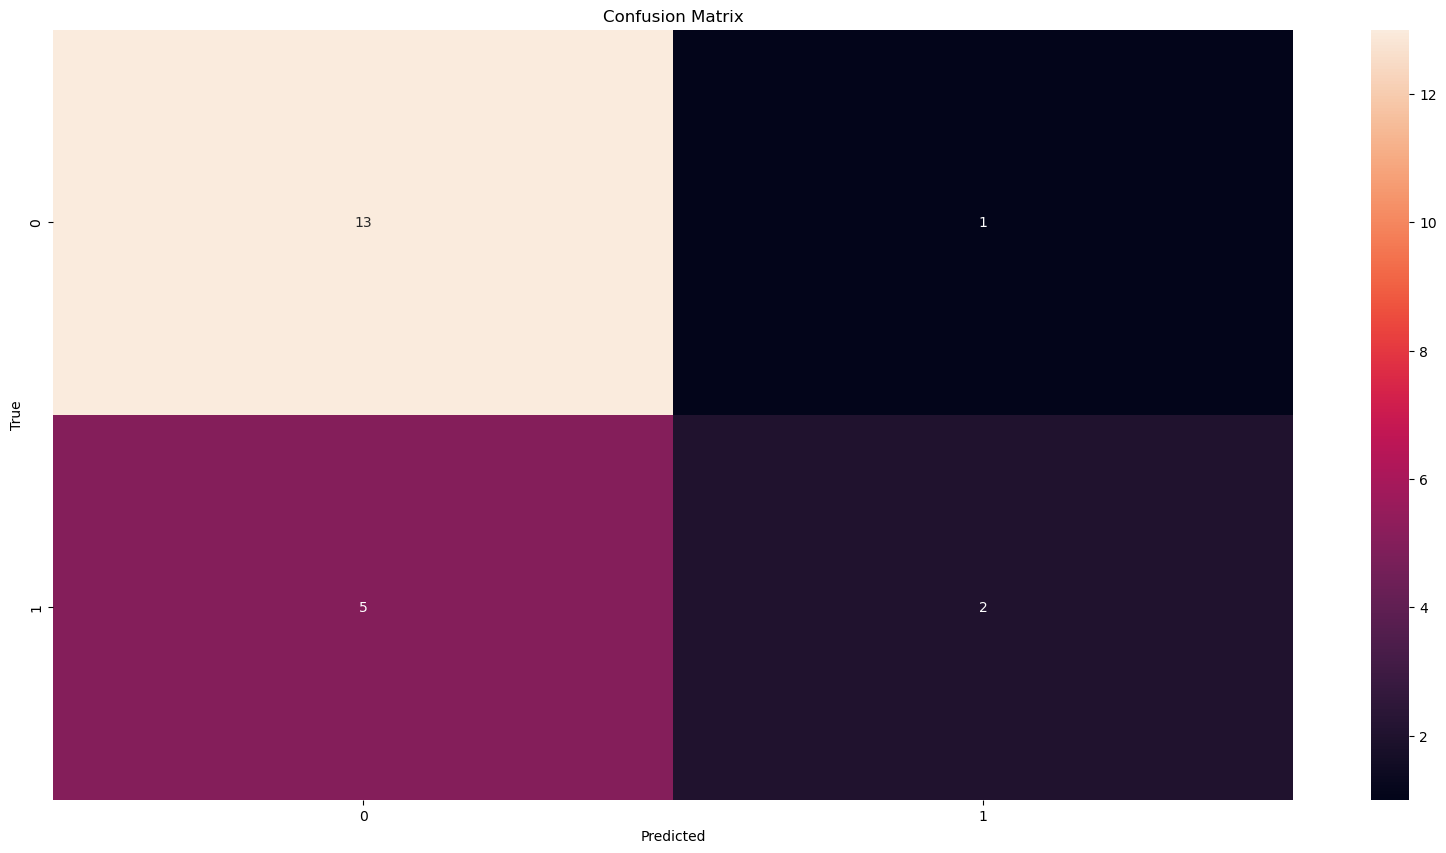

In [298]:
plt.figure(figsize = (20,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [299]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        14
           1       0.67      0.29      0.40         7

    accuracy                           0.71        21
   macro avg       0.69      0.61      0.61        21
weighted avg       0.70      0.71      0.68        21

